シミュレーション(1)-パーコレーション

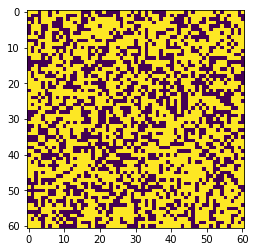

In [359]:
#############################################目標: 【パーコレーションをグラフから定性的に理解する】###################
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import collections
from scipy import optimize
####################################ここのパラメーター　占有確率 p  と　クラスターサイズ L  を変える  #################
L =61
p = 0.6
##################################################################################################################
A = np.zeros([L+1,L+1],dtype=int)
B = np.random.rand(L,L)
D = np.zeros([L,L],dtype=int)

def percolate(p):
    for i in range(L):
        for j in range(L):
            if B[i][j] >=1-p:
                B[i][j]=1
            else:
                B[i][j]=0 
              
percolate(p)
plt.imshow(B)
##############################################################シミュレーション実行は　　Ctrl + Enter 同時押し ########

シミュレーション(2)-パーコレーション確率

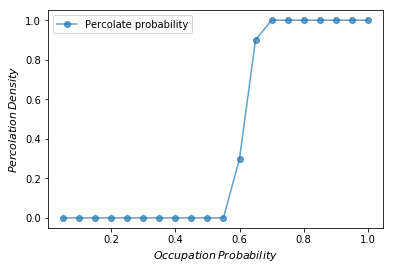

In [361]:
#############################################目標: 【 パーコレーション閾値を求める 】###################
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def right(tag,label):
    if tag[label-1] == label:
        return label
    else:
        return right(tag,tag[label-1])
            
def percolate(p,N):
    A = np.zeros([N+1,N+1],dtype=int)
    B = np.random.rand(N,N)
    D = np.zeros([N,N],dtype=int)
    n=1
    tag=[1]
    for i in range(N):
        for j in range(N):
            if B[i][j] >=1-p:    
                B[i][j]=1
            else:
                B[i][j]=0 
    
    for i in range(N):
        for j in range(N):
            A[i+1][j+1]=B[i][j]
    
    for i in range(1,N+1):
        for j in range(1,N+1):
            if A[i][j]!=0:
                if A[i-1][j]+A[i][j-1]==0:  
                    A[i][j]=n
                    n+=1
                    tag.append(n)
                
                elif A[i-1][j]>0 and A[i][j-1]==0: 
                    A[i][j]=A[i-1][j]
                
                elif A[i][j-1]>0 and A[i-1][j]==0:
                    A[i][j]=A[i][j-1]
                else:
                    if A[i-1][j]==A[i][j-1]:
                        A[i][j]= A[i-1][j]
                    else:
                        MIN = min(A[i-1][j],A[i][j-1])
                        MAX = max(A[i-1][j],A[i][j-1])
                        A[i][j] = tag[MIN-1]
                        tag[MAX-1] = tag[MIN-1]
            else:
                continue
   
    for i in range(1,N+1):
        for j in range(1,N+1):
            if A[i][j]!=0:
                A[i][j] = right(tag,A[i][j])
            else:
                continue
            
    for i in range(N):
        for j in range(N):
            D[i][j] = A[i+1][j+1]
     
    
    K = np.nanmax(np.intersect1d(D[0,:],D[N-1,:]))
    L = np.nanmax(np.intersect1d(D[:,0],D[:,N-1]))
                
    if K != 0 :
        return 1
    else:
        if L != 0:
            return 1
        else:
            return 0


def get_data(a,b,trial):
    data = 0
    for i in range(trial):
        data = data + percolate(a,b)
    return data/trial

re =[[]]
########################################### ここのパラメータ　試行回数 t　と　クラスターサイズ Lを変える ##############
t = 10
L = 100
##################################################################################################################
p_x =np.array([0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00])
x0 = np.append(re,get_data(p_x[0],L,t))
x1 = np.append(re,get_data(p_x[1],L,t))
x2 = np.append(re,get_data(p_x[2],L,t))
x3 = np.append(re,get_data(p_x[3],L,t))
x4 = np.append(re,get_data(p_x[4],L,t))
x5 = np.append(re,get_data(p_x[5],L,t))
x6 = np.append(re,get_data(p_x[6],L,t))
x7 = np.append(re,get_data(p_x[7],L,t))
x8 = np.append(re,get_data(p_x[8],L,t))
x9 = np.append(re,get_data(p_x[9],L,t))
x10 = np.append(re,get_data(p_x[10],L,t))
x11 = np.append(re,get_data(p_x[11],L,t))
x12 = np.append(re,get_data(p_x[12],L,t))
x13 = np.append(re,get_data(p_x[13],L,t))
x14 = np.append(re,get_data(p_x[14],L,t))
x15 = np.append(re,get_data(p_x[15],L,t))
x16 = np.append(re,get_data(p_x[16],L,t))
x17 = np.append(re,get_data(p_x[17],L,t))
x18 = np.append(re,get_data(p_x[18],L,t))
x19 = np.append(re,get_data(p_x[19],L,t))
y_data =np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19])

plt.ylabel(r'$Percolation\,Density$',fontsize=11)
plt.xlabel(r'$Occupation\,Probability$',fontsize=11)
plt.plot(p_x,y_data,'-o',label='Percolate probability',alpha=0.7)
plt.legend(loc ='best')
##############################################################シミュレーション実行は　　Ctrl + Enter 同時押し ########

シミュレーション(3)-フラクタル次元

C:\Users\clt10\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\clt10\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\clt10\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


nan

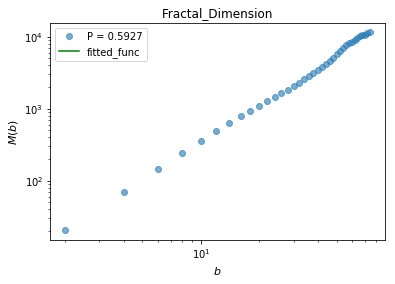

In [378]:
#############################################目標: 【 フラクタル次元を求める 】##########################
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import collections
from scipy import optimize
#################################################クラスターサイズ N は各自変えて良い #######################
N =100
##########################################################################################################
A = np.zeros([N+1,N+1],dtype=int)
B = np.random.rand(N,N)
D = np.zeros([N,N],dtype=int)
n=1
tag=[1]

def percolate(p):
    for i in range(N):
        for j in range(N):
            if B[i][j] >=1-p:
                B[i][j]=1
            else:
                B[i][j]=0 
                
percolate(0.63)


for i in range(N):
    for j in range(N):
        A[i+1][j+1]=B[i][j]


def right(tag,label):
    if tag[label-1] == label:
        return label
    else:
        return right(tag,tag[label-1])
        

for i in range(1,N+1):
    for j in range(1,N+1):
        if A[i][j]!=0:
            if A[i-1][j]+A[i][j-1]==0:  #←↑0なら新しくラベル付け
                A[i][j]=n
                n+=1
                tag.append(n)
                
            elif A[i-1][j]>0 and A[i][j-1]==0:           #←1なら受け継ぐ
                A[i][j]=A[i-1][j]
                
            elif A[i][j-1]>0 and A[i-1][j]==0:
                A[i][j]=A[i][j-1]            #↑1なら受け継ぐ
            else:
                if A[i-1][j]==A[i][j-1]:
                    A[i][j]= A[i-1][j]
                else:
                    MIN = min(A[i-1][j],A[i][j-1])
                    MAX = max(A[i-1][j],A[i][j-1])
                    A[i][j] = tag[MIN-1]
                    tag[MAX-1] = tag[MIN-1]
                    
        else:
            continue


for i in range(1,N+1):
    for j in range(1,N+1):
        if A[i][j]!=0:
            A[i][j] = right(tag,A[i][j])
        else:
            continue
            

for i in range(N):
    for j in range(N):
        D[i][j] = A[i+1][j+1]
D0 = D.reshape([1,N*N])
D1 = D0[D0 != 0]

c=collections.Counter(D1)
M = c.most_common()[0][0]
L = c.most_common()[0][1]

for i in range(N):
    for j in range(N):
        if D[i][j]==M:
            D[i][j]= D[i][j]
        else:
            D[i][j]= 0
            
nonzero = np.nonzero(D)

x0 = nonzero[0][0]
y0 = nonzero[1][0]
M_b =[]                 

###########################################################視野拡大法(正方形ベース)################################
L = len(D)              

for k in range(1,int(L/2)+1):
    b = np.array([0])
    for i,j in zip(nonzero[0],nonzero[1]):
        Rmax = min(L-i,L-j)
        if Rmax >=2*k:
            b = np.append(b,np.sum(D[i:i+2*k,j:j+2*k]))
        else:
            b = np.append(b, 0)
        y = np.average(b[np.nonzero(b)])
    M_b.append(y)

radius =[[]]
for i in range(1,int(L/2)+1):
    radius= np.append(radius,2*i)

    
X = np.array(radius)
Y = np.array(M_b)
##############################################################最小二乗法によるフィッティング####################
parameter_initial = np.array([0.0,0.0])

def fit(x,a,b):
    return np.exp(a)*(x**b)

def residual_func(parameter, x, y):
    residue = y - fit(x,parameter[0], parameter[1])
    return residue


result = optimize.leastsq(residual_func, parameter_initial, args =(X,Y))

parameter_optimal = result[0]
y = fit(X, parameter_optimal[0],parameter_optimal[1])

#両対数のグラフ書く
plt.xscale('log')
plt.yscale('log')
plt.title('Fractal_Dimension')
plt.xlabel(r'$b$', fontsize=11)
plt.ylabel(r'$M(b)$',fontsize=11)
plt.plot(X,Y,'o',label='P = 0.593',alpha=0.6)
plt.plot(X,y,'g-', label='fitted_func')
plt.legend(loc='best')
parameter_optimal[1]
##############################################################シミュレーション実行は　　Ctrl + Enter 同時押し ########

シミュレーション(4)-粗視化

In [ ]:
#############################################目標: 【 粗視化した場合のパーコレーション 】##########################
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import collections
from scipy import optimize
####################################ここのパラメーター　占有確率 p  と　クラスターサイズ L  を変える  #################
L =61
p = 0.6
##################################################################################################################
A = np.zeros([L+1,L+1],dtype=int)
B = np.random.rand(L,L)
D = np.zeros([L,L],dtype=int)

def percolate(p):
    for i in range(L):
        for j in range(L):
            if B[i][j] >=1-p:
                B[i][j]=1
            else:
                B[i][j]=0 
              
percolate(p)
plt.imshow(B)